In [152]:
# import statements
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# import MechDesign Helpers
import rm_python_lib.MechDesign.Helpers as HM

from rm_python_lib.MechDesign.Units.Units import m_, mm_, kg_, s_, N_, rpm_, W_, deg_
import rm_python_lib.MechDesign.Units.UnitMethods as UM

import rm_python_lib.MechDesign.RnM as RnM

### 1. Specifications and Requirements of Shaft 2


$$T_{nom,2} = 275.09 N$$

From TB1-1 Steel Selecction
$$R_{eN} = 550$$



In [153]:
# new shaft connection object
SC = RnM.ShaftConnection() 

# constants
SC.T_nom = 275.09
SC.T_eq = SC.T_nom
HM.EqPrint("T_nom",SC.T_nom * N_*m_ / W_)
# SC.T_eq = SC.E12_1_hC_DynamicLoadTorque()
HM.EqPrint("T_eq",SC.T_eq * N_*m_ / W_)


Eq(T_nom, 275.1*N_*m_/W_)

Eq(T_eq, 275.1*N_*m_/W_)

Eq(T_eq, 275.1*N_*m_/W_)

### 2. Tangential Force Ft,nom
Diameter of Shaft 2
$$d_2 = 30 mm$$

Equation for Ft,nom
$$\frac{2*T_{nom}}{\frac{d_2}{1000}}$$

In [154]:
SC.d = 30
F_t_nom = (2 * SC.T_nom) / (SC.d / 1000)
F_t = F_t_nom
HM.EqPrint("F_t,nom",F_t_nom / W_ * N_)
HM.EqPrint("F_t",F_t /W_ * N_)

Eq(F_t,nom, 18340.0*N_/W_)

Eq(F_t, 18340.0*N_/W_)

Eq(F_t, 18340.0*N_/W_)

### 3. Calculate average pressure p_gem as a function of key length l

Standardized Key for shaft 2 30mm from Table 12-2a:
- Width b = 10mm
- Height h = 8mm

Key length range limits:
- l > b=10mm
- l_max is based on l' <= 1.3*d

Using TB1-1, C45E  
ReNKey = 550 N/mm^2

$$R_{e, key} = K_t * R_{eN}$$

Ductile Material (Steel shaft and key):
<br>
Safety factor against plastic deformation 
$$S_F = 1.5$$

$$\bar{p} = R_{e, key} / S_F$$



In [155]:
# constants based on Motor Selection
SC.phi = 1 # 1key
SC.n = 1 # 1 key
SC.K_lambda = 1 # method C

SC.K_t = 0.975
SC.b = 10
SC.h = 8
S_F = 1.5

# Motor Shaft
ReN_shaft = 550
Re_shaft = ReN_shaft * SC.K_t
HM.EqPrint('R_eShaft',Re_shaft)

# Key Yield Strength
ReN_key = 550
Re_key = ReN_key * SC.K_t
HM.EqPrint('R_eKey',Re_key)

p_bar = Re_key / S_F
HM.EqPrint('p_bar',p_bar)

SC.lprime = SC.l - SC.b

SC.hprime = SC.h * 0.45

T_eq_Nmm = SC.T_eq * 1000

# p_gem as a function of l
SC.p_gem = (2 * T_eq_Nmm * SC.K_lambda) / (SC.d * SC.hprime * SC.lprime * SC.n * SC.phi)
# print(p_gem)
HM.EqPrint('p_gem',SC.p_gem)


# Safety factor S
S = p_bar / SC.p_gem
HM.EqPrint('S',S)
# print(S)


Eq(R_eShaft, 536.2)

Eq(R_eKey, 536.2)

Eq(p_bar, 357.5)

Eq(p_gem, 550200.0/(108.0*_l - 1080.0))

Eq(S, 0.07018*_l - 0.7018)

Eq(S, 0.07018*_l - 0.7018)

### 3. Plot Graphs

$$L_{limit} = 1.3*d + b$$

49.0


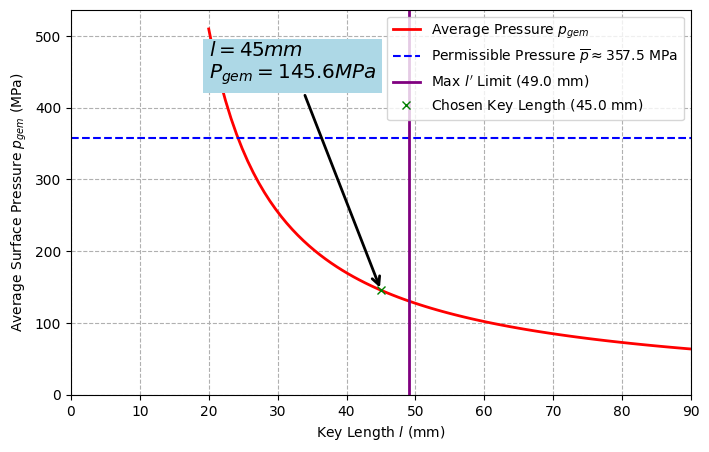

In [156]:
# Key Length Range
l_min = SC.b + 1.0
l_max = 1.3 * SC.d
l_limit = l_max+SC.b
print(l_limit)
x = np.linspace(20, 100, 100)
# SC.lprime = SC.l - SC.b
# # p_gem as a function of l
y = 550220.0 / (108 * x - 1080.0)
# print(SC.l)
# print(SC.p_gem)

# key length
chosen_length = 45
chosen_pressure = 550220.0 / (108 * chosen_length - 1080.0)

plt.figure(figsize=(8,5))
plt.plot(x,y,label=r'Average Pressure $p_{gem}$', color='red', linewidth=2)
textsize = 'x-large'
plt.axhline(p_bar, color='blue', linestyle='--', 
            label=r'Permissible Pressure $\overline{{p}} \approx 357.5$ MPa')
plt.axvline(l_limit, color='purple', linestyle='-', 
            label=f"Max $l'$ Limit ($49.0$ mm)", linewidth=2)
plt.xlabel(r'Key Length $l$ (mm)')
plt.ylabel(r'Average Surface Pressure $p_{gem}$ (MPa)')
# plt.title(f'Key Pressure vs. Length for Motor Pulley ($T_{{eq}}={T_eq:.1f}$ Nm)')
#show surface pressure with choosen key length
x_index = 45
length_specific = x_index
y_intersect = 550220.0 / (108 * x_index - 1080.0)
plt.annotate(f'$l = {length_specific}mm$ \n$P_{{gem}}= {y_intersect:.1f} MPa$'
             ,xy=(length_specific,y_intersect),xytext=(20,440),size=textsize
             ,arrowprops=dict(arrowstyle='->', color='black', linewidth=2)
             ,bbox=dict(facecolor='lightblue',edgecolor='none'))

plt.grid(True, which='both', linestyle='--')
plt.ylim(0, p_bar * 1.5) 
plt.xlim(0, 90)
plt.plot(chosen_length, chosen_pressure, 'x', color='green', label=f'Chosen Key Length ($45.0$ mm)')

plt.legend()

plt.show()

In [ ]:
l_final = 45
S =0.07018 * l_final - 0.7018
HM.EqPrint('S',S)

Eq(S, 2.456)

Eq(S, 2.456)